In [2]:
import openpyxl
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'gold-medal-times.xlsx'

# Load the 'Data' worksheet
data = pd.read_excel(file_path, sheet_name='Data', usecols='B:D')


# Rename columns
data = data.rename(columns={'Unnamed: 1': 'Year','Unnamed: 2': 'Men', 'Unnamed: 3': 'Women'})

# Convert the columns to numeric, ignoring non-numeric values
data['Men'] = pd.to_numeric(data['Men'], errors='coerce')
data['Women'] = pd.to_numeric(data['Women'], errors='coerce')


# Print the first few lines of the 'Data' worksheet
print(data.head(25))

def convert_to_minutes_seconds(time_in_seconds):
    minutes = int(time_in_seconds // 60)
    seconds = time_in_seconds % 60
    return f"{minutes}:{seconds:.2f}"

# Calculate nanmax and nanmin of columns
max_value_men = convert_to_minutes_seconds(np.nanmax(data['Men']))
min_value_men = convert_to_minutes_seconds(np.nanmin(data['Men']))
max_value_women = convert_to_minutes_seconds(np.nanmax(data['Women']))
min_value_women = convert_to_minutes_seconds(np.nanmin(data['Women']))

print("Slowest Winning Time Men:", max_value_men)
print("Fastest Winning Time Men:", min_value_men)
print("Slowest Winning Time Women:", max_value_women)
print("Fastest Winning Time Women:", min_value_women)

                                                 Year     Men   Women
0                                                 NaN     NaN     NaN
1   Gold medal times in the 1,500m at the Summer O...     NaN     NaN
2   Gold medal winning times in the Men's and Wome...     NaN     NaN
3                                                 NaN     NaN     NaN
4                                         Athens 1896  273.20     NaN
5                                          Paris 1900  246.20     NaN
6                                      St. Louis 1904  245.40     NaN
7                                         London 1908  243.40     NaN
8                                      Stockholm 1912  236.80     NaN
9                                        Antwerp 1920  241.80     NaN
10                                         Paris 1924  233.60     NaN
11                                     Amsterdam 1928  233.20     NaN
12                                   Los Angeles 1932  231.20     NaN
13                  

In [3]:
import pandas as pd

# Load the Excel file
file_path = 'medals-per-country.xlsx'

# Load the 'Data' worksheet
data = pd.read_excel(file_path, sheet_name='Data', usecols='B:E')

# Rename columns
data = data.rename(columns={'Unnamed: 1': 'Country','Unnamed: 2': 'Gold', 'Unnamed: 3': 'Silver', 'Unnamed: 4': 'Bronze'})

# Convert the columns to numeric, ignoring non-numeric values
data['Gold'] = pd.to_numeric(data['Gold'], errors='coerce')
data['Silver'] = pd.to_numeric(data['Silver'], errors='coerce')
data['Bronze'] = pd.to_numeric(data['Bronze'], errors='coerce')

# Print the first few lines of the 'Data' worksheet
print(data.head(10))

# Find the country with the most gold, silver, and bronze medals
most_gold_country = data.loc[data['Gold'].idxmax()]['Country']
most_silver_country = data.loc[data['Silver'].idxmax()]['Country']
most_bronze_country = data.loc[data['Bronze'].idxmax()]['Country']

# Get the count of medals for each country
most_gold_count = int(data['Gold'].max())
most_silver_count = int(data['Silver'].max())
most_bronze_count = int(data['Bronze'].max())

print("Country with the most gold medals:", most_gold_country, "with", most_gold_count, "gold medals")
print("Country with the most silver medals:", most_silver_country, "with", most_silver_count, "silver medals")
print("Country with the most bronze medals:", most_bronze_country, "with", most_bronze_count, "bronze medals")

                                             Country  Gold  Silver  Bronze
0                                                NaN   NaN     NaN     NaN
1  Medal count by country in the Men's 1,500m at ...   NaN     NaN     NaN
2  Medal count by country in the Men's 1,500m at ...   NaN     NaN     NaN
3                                                NaN   NaN     NaN     NaN
4                                      Great Britain   5.0     5.0     4.0
5                                              Kenya   4.0     3.0     2.0
6                                      United States   3.0     7.0     4.0
7                                        New Zealand   3.0     1.0     3.0
8                                            Finland   3.0     NaN     1.0
9                                            Algeria   2.0     1.0     NaN
Country with the most gold medals: Great Britain with 5 gold medals
Country with the most silver medals: United States with 7 silver medals
Country with the most bronze medals

*********** Example Row ***********
    ID                                Name Sex   Age  Height  Weight    Team  \
98  34  Jamale (Djamel-) Aarrass (Ahrass-)   M  30.0   187.0    76.0  France   

    NOC        Games  Year  Season    City      Sport  \
98  FRA  2012 Summer  2012  Summer  London  Athletics   

                           Event Medal  
98  Athletics Men's 1,500 metres   NaN  
*********** Oldest Entries ***********
                       Name           Team  Year    City   Medal
22952  Arthur Charles Blake  United States  1896  Athina  Silver
68791        Angelos Fetsis         Greece  1896  Athina     NaN
*********** Newest Entries ***********
                   Name                  Team  Year            City Medal
3042  Malika Al-Akkaoui               Morocco  2016  Rio de Janeiro   NaN
3811      Saud Al-Zaabi  United Arab Emirates  2016  Rio de Janeiro   NaN
*********** Average Gold Medallist Biostatistics ***********
Average height, weight, and BMI of Gold Medalists 

<Figure size 1000x600 with 0 Axes>

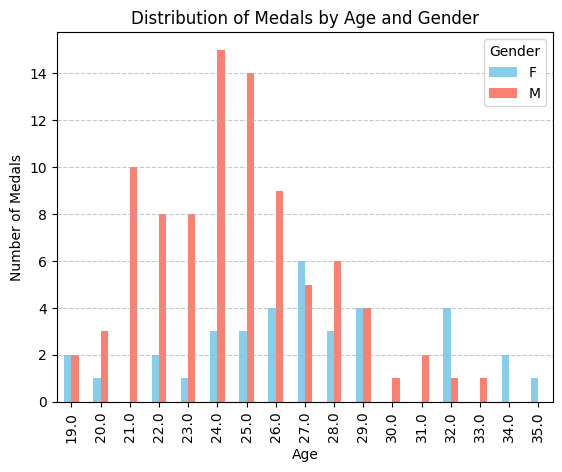

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'longitudinal-data.csv'

# Load the 'Data' worksheet
data = pd.read_csv(file_path)

filtered_data = data[data['Event'].str.contains("1,500 metres") & data['Sport'].str.contains("Athletics")]

# Print the first few lines of the 'Data' worksheet
print("*********** Example Row ***********")
print(filtered_data.head(1))

oldest_performances = data['Year'].min()
most_recent_performances = data['Year'].max()

old_data = filtered_data[filtered_data['Year']==oldest_performances]
new_data = filtered_data[filtered_data['Year']==most_recent_performances]
print("*********** Oldest Entries ***********")
print(old_data.head(2)[['Name','Team','Year','City','Medal']])
print("*********** Newest Entries ***********")
print(new_data.head(2)[['Name','Team','Year','City','Medal']])

print("*********** Average Gold Medallist Biostatistics ***********")
# BMI = weight / height**2
gold_medalist_data = filtered_data[filtered_data['Medal'] == 'Gold']
gold_medalist_stats = gold_medalist_data.groupby('Sex').agg({'Height': 'mean', 'Weight': 'mean'})
gold_medalist_stats['BMI'] = gold_medalist_stats['Weight'] / ((gold_medalist_stats['Height'] / 100) ** 2)  # Convert height to meters
print("Average height, weight, and BMI of Gold Medalists by Sex:")
print(gold_medalist_stats)

print("*********** Average Non-Medallist Biostatistics ***********")
non_medalist_data = filtered_data[filtered_data['Medal'].isnull()]  # Filter for rows where Medal is NaN
non_medalist_stats = non_medalist_data.groupby('Sex').agg({'Height': 'mean', 'Weight': 'mean'})
non_medalist_stats['BMI'] = non_medalist_stats['Weight'] / ((non_medalist_stats['Height'] / 100) ** 2) 
print("Average height, weight, and BMI of Non-Medalists by Sex:")
print(non_medalist_stats)


# Filter for 1500m athletes with medals
medalist_data = filtered_data.dropna(subset=['Medal'])

# Group by 'Name' and 'Sex', then count the number of medals
medals_count = medalist_data.groupby(['Name', 'Sex']).size().reset_index(name='Medal Count')

# Find the athlete with the most medals for each sex
max_medals_male = medals_count[medals_count['Sex'] == 'M'].nlargest(3, 'Medal Count')
max_medals_female = medals_count[medals_count['Sex'] == 'F'].nlargest(3, 'Medal Count')

print("Male athletes with the most 1500m medals:")
print(max_medals_male)

print("\nFemale athletes with the most 1500m medals:")
print(max_medals_female)

# Filter for athletes with gold medals
gold_medalist_data = filtered_data[filtered_data['Medal'] == 'Gold']

# Group by 'Name' and 'Sex', then count the number of gold medals
gold_medals_count = gold_medalist_data.groupby(['Name', 'Sex']).size().reset_index(name='Gold Medal Count')

# Find the athlete with the most gold medals for each sex
max_gold_medals_male = gold_medals_count[gold_medals_count['Sex'] == 'M'].nlargest(3, 'Gold Medal Count')
max_gold_medals_female = gold_medals_count[gold_medals_count['Sex'] == 'F'].nlargest(3, 'Gold Medal Count')

print("Male athletes with the most 1500m gold medals:")
print(max_gold_medals_male)

print("\nFemale athletes with the most 1500m gold medals:")
print(max_gold_medals_female)

# Group by 'Age' and 'Sex', then count the number of medals for each age and gender
medals_by_age_gender = medalist_data.groupby(['Age', 'Sex']).size().reset_index(name='Medals')

# Pivot the data to have separate columns for each gender
medals_by_age_gender_pivot = medals_by_age_gender.pivot(index='Age', columns='Sex', values='Medals')

# Plot the distribution
plt.figure(figsize=(10, 6))
medals_by_age_gender_pivot.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Medals by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Initially, I was taken aback when observing that BMI was higher for gold medallists than for non medallists. I initially thought this was wrong, so I split the data into male and female categories, yet once again I observed the same issue in both groups: BMI was still higher for gold medallists! Thus I came to the conclusion that this is because Gold Medallists have more muscle mass rather than a higher body fat percentage. This is because BMI does not distinguish between excess fat, muscle, or bone mass.

Regarding the athletes with the most medals, we see that Faith Kipyegon only has a gold medal count of 1: we are missing her Olympic Gold in 2020 because our database's latest records are from the 2016 Olympics. Jim Lightbody is counted to have 2 gold medals, however one of these medals was earned during the 1906 intercalated games which are no longer recognized by the IOC. We also see Sebastian Coe's Gold medals from 1980 and 1984. We can also see 2 legendary 1500m male athletes: Bernard Lagat and Hicham El Guerrouj, the current 1500m world record holder. 